In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils import data_preparation, vizualization

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
files = [  # files to use in models
    'friday_ddos',
    'friday_portscan',
    'friday_bot',
    'monday_benign',
    'thursday_infiltration',
    'thursday_webattacks',
    'tuesday_bruteforce',
    'wednesday_dos_heartbleed'
]

In [5]:
data = data_preparation.load_data(files)

In [6]:
data = data_preparation.clean_column_names(data)

In [7]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [9]:
data['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [10]:
data = data_preparation.remove_duplicates(data)

Removed 256479 duplicate rows (remaining: 2574264)


## Extracting relevant data

In [11]:
data = data_preparation.select_relevant_columns(data)

RELEVANT_COLUMNS = ['ACK Flag Count', 'Destination Port', 'FIN Flag Count', 'Flow Duration', 'PSH Flag Count', 'SYN Flag Count', 'Total Backward Packets', 'Total Fwd Packets', 'Total Length of Bwd Packets', 'Total Length of Fwd Packets', 'Label']
Using 11 of 11 features (100.0%)


In [12]:
data.head()

,ACK Flag Count,Destination Port,FIN Flag Count,Flow Duration,PSH Flag Count,SYN Flag Count,Total Backward Packets,Total Fwd Packets,Total Length of Bwd Packets,Total Length of Fwd Packets,Label
0,1,54865,0,3,0,0,0,2,0,12,BENIGN
1,1,55054,0,109,0,0,1,1,6,6,BENIGN
2,1,55055,0,52,0,0,1,1,6,6,BENIGN
3,1,46236,0,34,0,0,1,1,6,6,BENIGN
4,1,54863,0,3,0,0,0,2,0,12,BENIGN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2574264 entries, 0 to 2830742
Data columns (total 11 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   ACK Flag Count               int64 
 1   Destination Port             int64 
 2   FIN Flag Count               int64 
 3   Flow Duration                int64 
 4   PSH Flag Count               int64 
 5   SYN Flag Count               int64 
 6   Total Backward Packets       int64 
 7   Total Fwd Packets            int64 
 8   Total Length of Bwd Packets  int64 
 9   Total Length of Fwd Packets  int64 
 10  Label                        object
dtypes: int64(10), object(1)
memory usage: 235.7+ MB


In [14]:
data.describe()

,ACK Flag Count,Destination Port,FIN Flag Count,Flow Duration,PSH Flag Count,SYN Flag Count,Total Backward Packets,Total Fwd Packets,Total Length of Bwd Packets,Total Length of Fwd Packets
count,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06,2.574264e+06
mean,3.102491e-01,8.536691e+03,3.160049e-02,1.624710e+07,2.915237e-01,4.810734e-02,1.136349e+01,1.011058e+01,1.776992e+04,6.009951e+02
std,4.625956e-01,1.887560e+04,1.749340e-01,3.494512e+07,4.544642e-01,2.139931e-01,1.045890e+03,7.861279e+02,2.373144e+06,1.047808e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.300000e+01,0.000000e+00,1.990000e+02,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,1.200000e+01
50%,0.000000e+00,8.000000e+01,0.000000e+00,4.881500e+04,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.520000e+02,6.600000e+01
75%,1.000000e+00,4.430000e+02,0.000000e+00,5.222702e+06,1.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,8.600000e+02,3.250000e+02
max,1.000000e+00,6.553500e+04,1.000000e+00,1.200000e+08,1.000000e+00,1.000000e+00,2.919220e+05,2.197590e+05,6.554530e+08,1.290000e+07


In [15]:
data = data[data['Flow Duration'] >= 0]

In [16]:
data.isnull().sum()

ACK Flag Count                 0
Destination Port               0
FIN Flag Count                 0
Flow Duration                  0
PSH Flag Count                 0
SYN Flag Count                 0
Total Backward Packets         0
Total Fwd Packets              0
Total Length of Bwd Packets    0
Total Length of Fwd Packets    0
Label                          0
dtype: int64

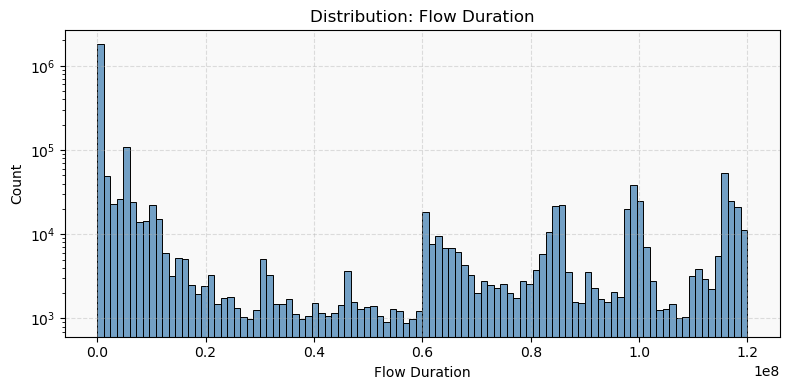

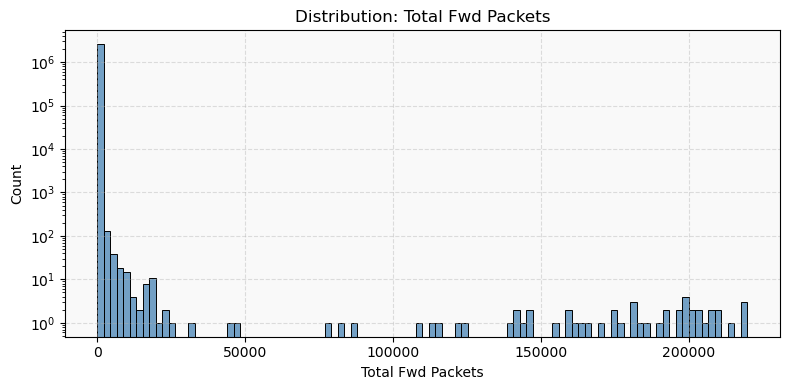

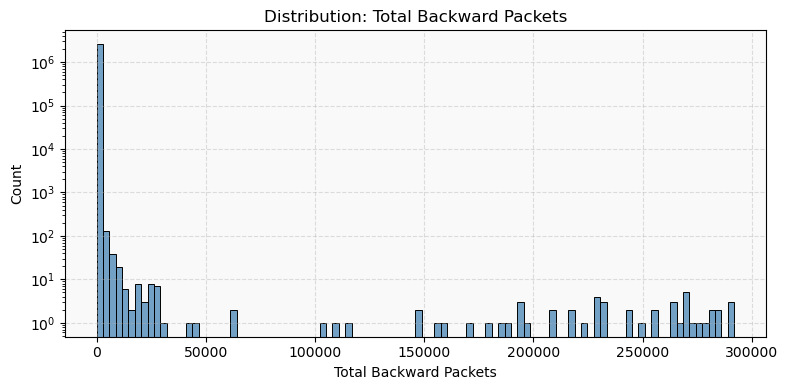

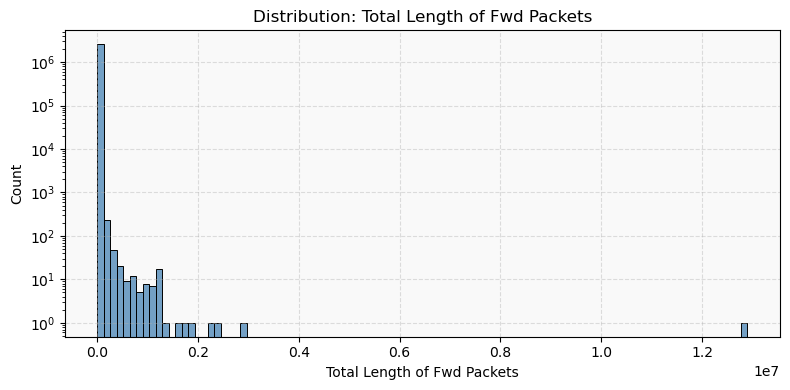

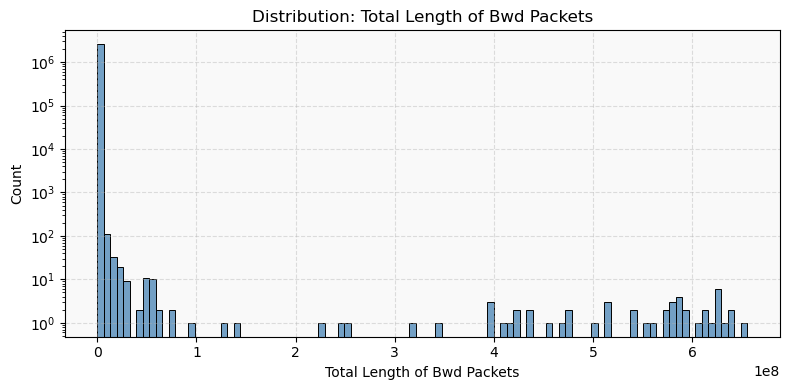

In [17]:
vizualization.plot_feature_distributions(data, columns=[
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets'
])

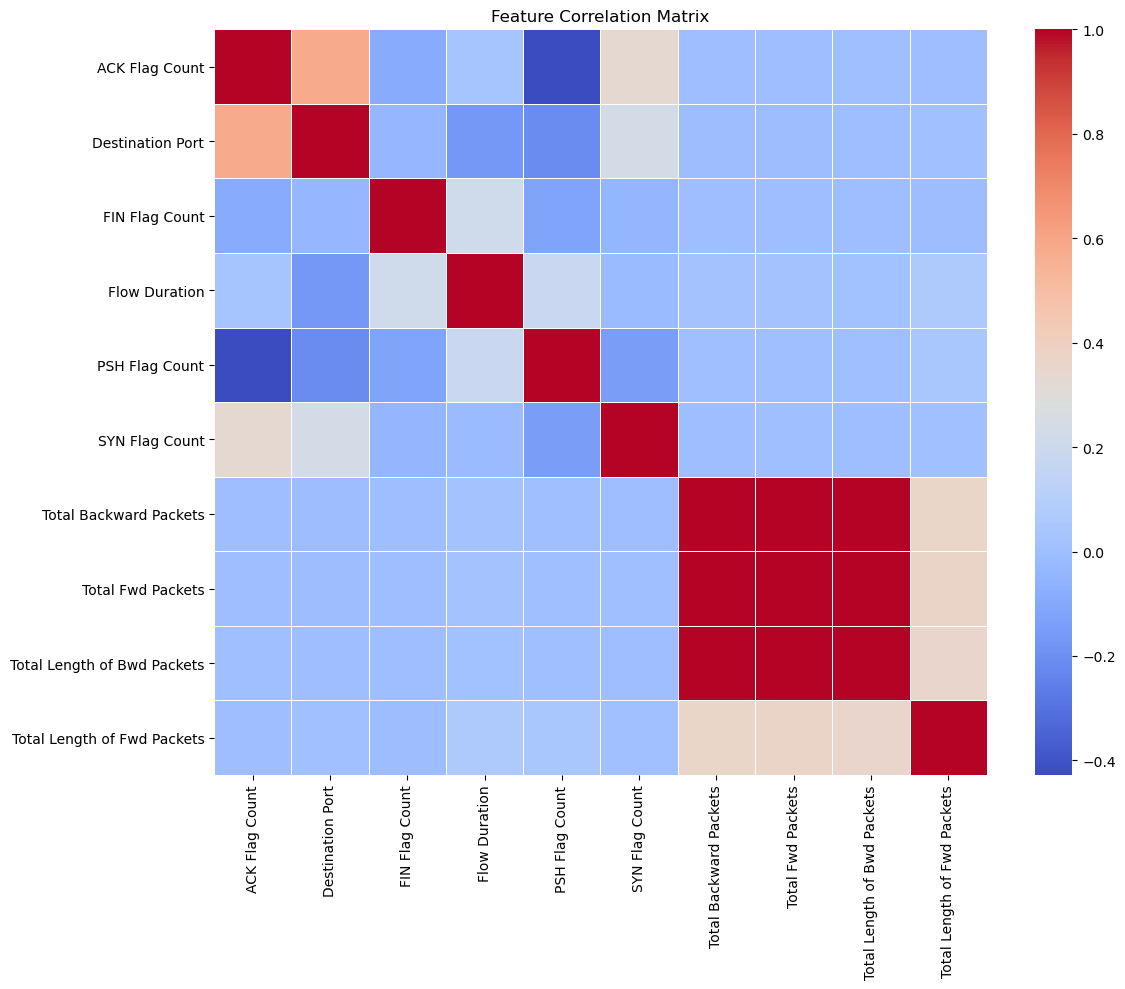

In [18]:
vizualization.correlation_matrix(data)

Drop 'Total Length of Fwd Packets' and 'Total Length of Bwd Packets' These features are highly correlated (ρ ≈ 1.0) with 'Total Fwd Packets' and 'Total Backward Packets', which means they carry redundant information.

In [19]:
columns_to_drop = ['Total Length of Fwd Packets', 'Total Length of Bwd Packets']
data = data.drop(columns=columns_to_drop)

### Encoding 

In [20]:
data['attack_types'] = data['Label'].copy()

In [21]:
data.head()

,ACK Flag Count,Destination Port,FIN Flag Count,Flow Duration,PSH Flag Count,SYN Flag Count,Total Backward Packets,Total Fwd Packets,Label,attack_types
0,1,54865,0,3,0,0,0,2,BENIGN,BENIGN
1,1,55054,0,109,0,0,1,1,BENIGN,BENIGN
2,1,55055,0,52,0,0,1,1,BENIGN,BENIGN
3,1,46236,0,34,0,0,1,1,BENIGN,BENIGN
4,1,54863,0,3,0,0,0,2,BENIGN,BENIGN


In [22]:
data = data_preparation.encode_labels(data, 'Label')

In [23]:
data.head()

,ACK Flag Count,Destination Port,FIN Flag Count,Flow Duration,PSH Flag Count,SYN Flag Count,Total Backward Packets,Total Fwd Packets,Label,attack_types
0,1,54865,0,3,0,0,0,2,0,BENIGN
1,1,55054,0,109,0,0,1,1,0,BENIGN
2,1,55055,0,52,0,0,1,1,0,BENIGN
3,1,46236,0,34,0,0,1,1,0,BENIGN
4,1,54863,0,3,0,0,0,2,0,BENIGN


In [24]:
data['Label'].value_counts()

0    2148273
1     425878
Name: Label, dtype: int64

Label distribution after encoding:
- 0 (BENIGN): 2 148 273 (~83%)
- 1 (ATTACK): 425 878 (~17%)

### Unified column names 

In [25]:
data = data_preparation.rename_columns(data)

In [26]:
data.head()

,ack_flag,dst_port,fin_flag,flow_duration,psh_flag,syn_flag,bwd_pkts,fwd_pkts,label,attack_types
0,1,54865,0,3,0,0,0,2,0,BENIGN
1,1,55054,0,109,0,0,1,1,0,BENIGN
2,1,55055,0,52,0,0,1,1,0,BENIGN
3,1,46236,0,34,0,0,1,1,0,BENIGN
4,1,54863,0,3,0,0,0,2,0,BENIGN


### Save ready dataset

In [27]:
data.columns

Index(['ack_flag', 'dst_port', 'fin_flag', 'flow_duration', 'psh_flag',
       'syn_flag', 'bwd_pkts', 'fwd_pkts', 'label', 'attack_types'],
      dtype='object')

# 1) cic-ids2017_allattacks_binary_clean

This version was built to support binary classification, where the target column `Label` indicated whether a traffic flow was malicious or benign:
- `Label = BENIGN` → Normal traffic
- `Label = ATTACK` (any attack label) → Malicious traffic

The column `Label` was encoded to 0 (benign) and 1 (attack) to train classifiers

In [30]:
columns = ['ack_flag', 'dst_port', 'fin_flag', 'flow_duration', 'psh_flag', 'syn_flag', 'bwd_pkts', 'fwd_pkts', 'label']
data_preparation.save_dataset(data, 'cic-ids2017_allattacks_binary_clean', columns=columns)

Dataset saved to: C:\Users\Karol\inne\magisterka\threat-ml-trainer-main\utils\..\datasets\cic-ids2017_allattacks_binary_clean_20250726_204828.csv


'C:\\Users\\Karol\\inne\\magisterka\\threat-ml-trainer-main\\utils\\..\\datasets\\cic-ids2017_allattacks_binary_clean_20250726_204828.csv'

# 2) cic-ids2017_allattacks_multiclass_clean

This updated version was prepared to support **multiclass classification**, where each type of attack (e.g. DDoS, PortScan, Heartbleed) is treated as a separate class.

- The column `attack_types` was derived from the original `Label` column
- This setup allows for more fine-grained classification and evaluation

In [31]:
columns = ['ack_flag', 'dst_port', 'fin_flag', 'flow_duration', 'psh_flag', 'syn_flag', 'bwd_pkts', 'fwd_pkts', 'attack_types']
data_preparation.save_dataset(data, 'cic-ids2017_allattacks_multiclass_clean', columns=columns, include_timestamp=False)

Dataset saved to: C:\Users\Karol\inne\magisterka\threat-ml-trainer-main\utils\..\datasets\cic-ids2017_allattacks_multiclass_clean.csv


'C:\\Users\\Karol\\inne\\magisterka\\threat-ml-trainer-main\\utils\\..\\datasets\\cic-ids2017_allattacks_multiclass_clean.csv'